### OBJECTIVE

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number 

    3. a. Use elbow method as baseline

    3. b. Apply other methods to compare with elbow

4. Use Pipeline

    4. a. Use scaler and dimensional reduction.

    4. b. Use suitable clustering model for this problem.
     
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion 


### DATA DESCRIPTION

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px

In [2]:
# Đọc file CSV từ dữ liệu đã tải lên
df = pd.read_csv("cluster_customer.csv")
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

# Data Analysis

Check the missing/duplicated values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df = df.drop(df.columns[0], axis = 1)

# Data Preprocessing

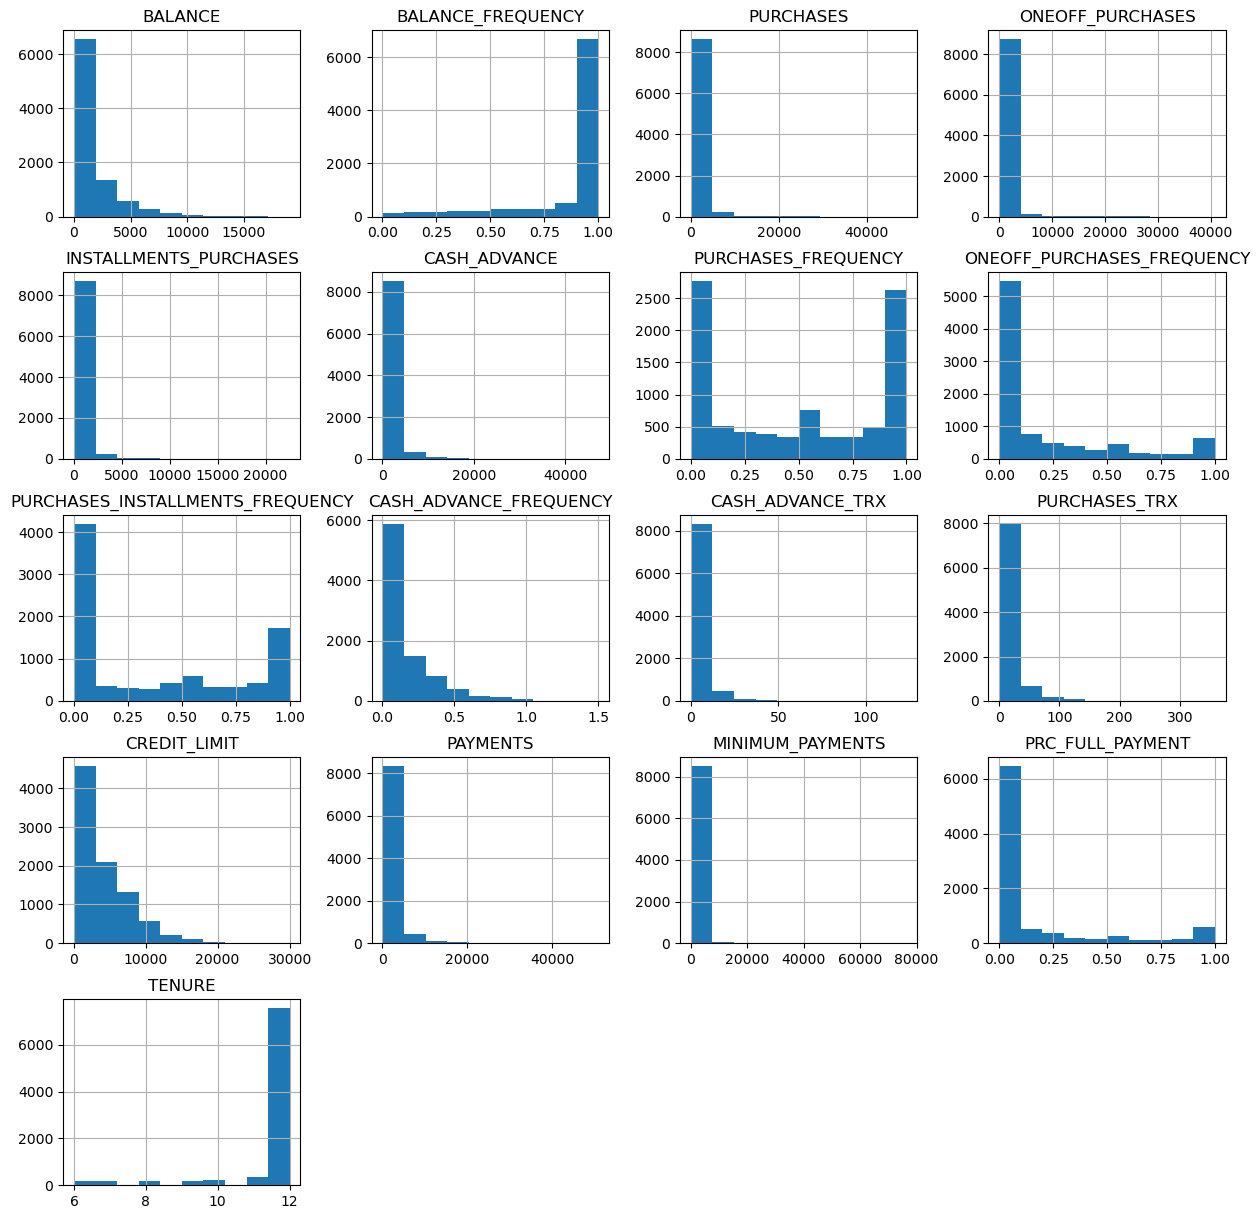

In [20]:
# Data distribution
df.hist(figsize=(15, 15))
plt.show()

In [7]:
# Data type classification
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 17
Discrete features Count 1
Continuous features Count 16
Categorical features Count 0
Binary Categorical features Count 0


#### Missing values

In [8]:
# "CREDIT_LIMIT" column has one mising value
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [9]:
# Remove missing value in "CREDIT_LIMIT" column 
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
# MINIMUM_PAYMENTS has so much missing value so it is reasonable to find a solution for fill them
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


The value of zero should be used for MINIMUM_PAYMENTS's cells Who they haven't done any payments so ➡ PAYMENTS = 0 ➡ MINIMUM_PAYMENTS = 0
The solution to handle missing value in MINIMUM_PAYMENTS column:
- If it has the value of PAYMENTS and is equal to zero, we consider the zero for it
- If PAYMENTS is a value between 0 and PAYMENTS_MEAN, we use PAYMENTS
- Otherwise, we use PAYMENTS_MEAN

In [11]:
# There are a number of rows where PAYMENTS's values are less than MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])]

Shape: (2364, 2)


,PAYMENTS,MINIMUM_PAYMENTS
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490
...,...,...
8932,106.138603,337.294767
8938,72.530037,110.950798
8946,81.270775,82.418369
8947,52.549959,55.755628


In [12]:
minpay = df['MINIMUM_PAYMENTS'].copy() # make a copy of MINIMUM_PAYMENTS
payments_mean = np.mean(df['PAYMENTS']) # take the mean value of PAYMENTS

i = 0
for payments, minpayments in zip(df['PAYMENTS'], df['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):
        minpay[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True): 
        minpay[i] = payments
    elif minpayments == True: 

        minpay[i] = payments_mean
    i += 1
    
print(f'Missing (before): {df.isna().sum().sum()}')
print(f'Missing (after): {minpay.isna().sum().sum()}')

df['MINIMUM_PAYMENTS'] = minpay.copy()

Missing (before): 313
Missing (after): 0


##### Check and remove outliers

In [13]:
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [14]:
def plot_boxplot(df, continuous_features):
    data = df[continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,40))
    fig.subplots_adjust(hspace=0.7)
    
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'{feature}', fontdict=font)
    plt.show()

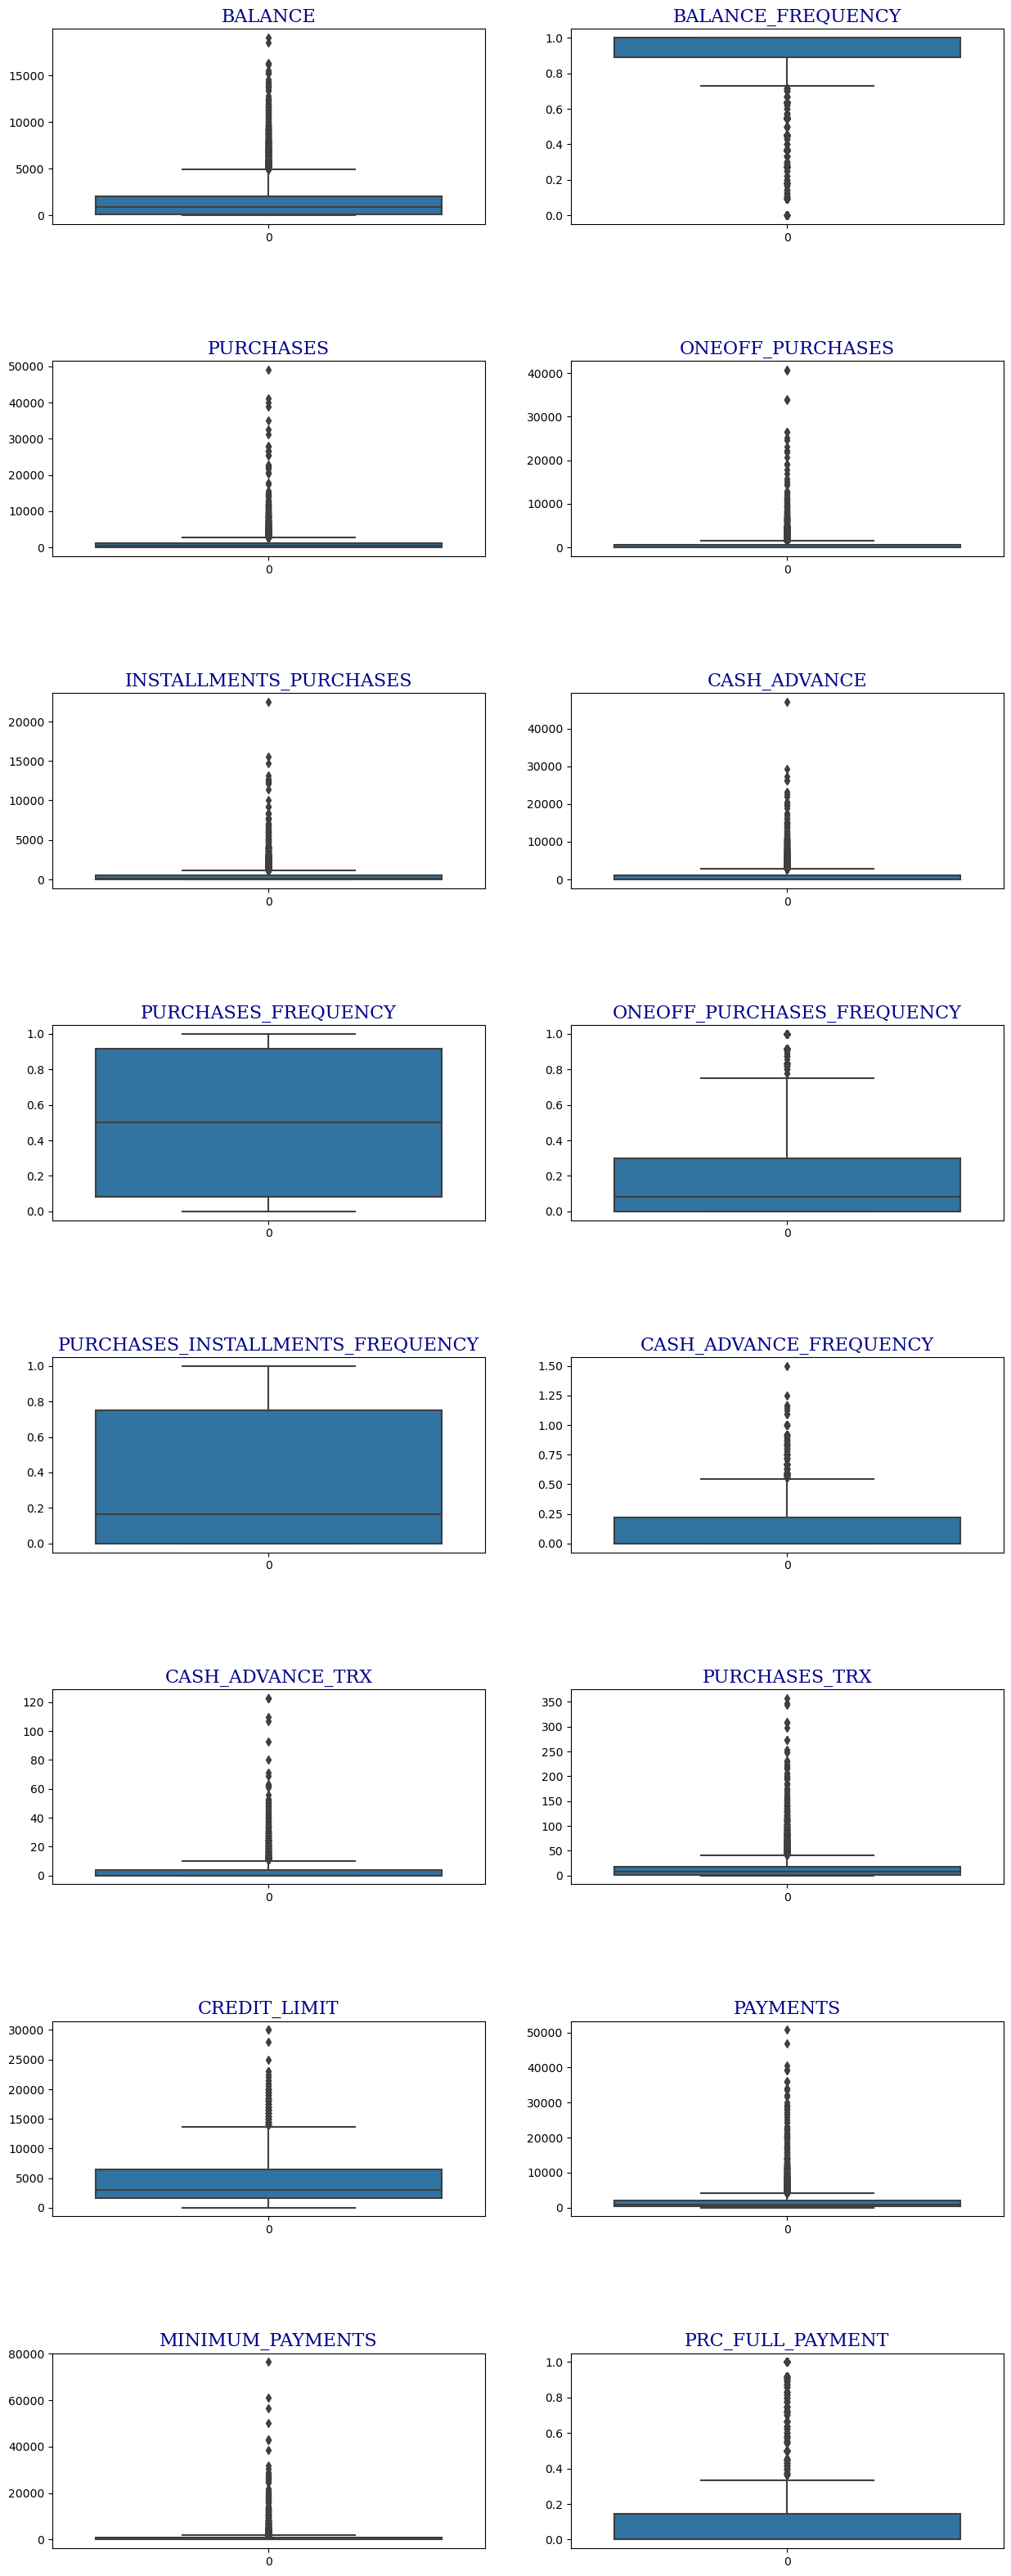

In [15]:
plot_boxplot(df, continuous_features)

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_outlier = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()

df_count_outlier = pd.DataFrame(count_outlier, columns=['count_out'])
df_count_outlier

,count_out
BALANCE,695
BALANCE_FREQUENCY,1492
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


 As we can see there are so many outliers base on defention. However removing them is not recommended. this obstacle should be solved by other methods

In [17]:
 #Dropping some of outliers 
df = df[(df['BALANCE']<15000)]
df = df[(df['PURCHASES']<40000)]
df = df[(df['ONEOFF_PURCHASES']<30000)]
df = df[(df['INSTALLMENTS_PURCHASES']<20000)]
df = df[(df['CASH_ADVANCE']<40000)]
df = df[(df['MINIMUM_PAYMENTS']<60000)]

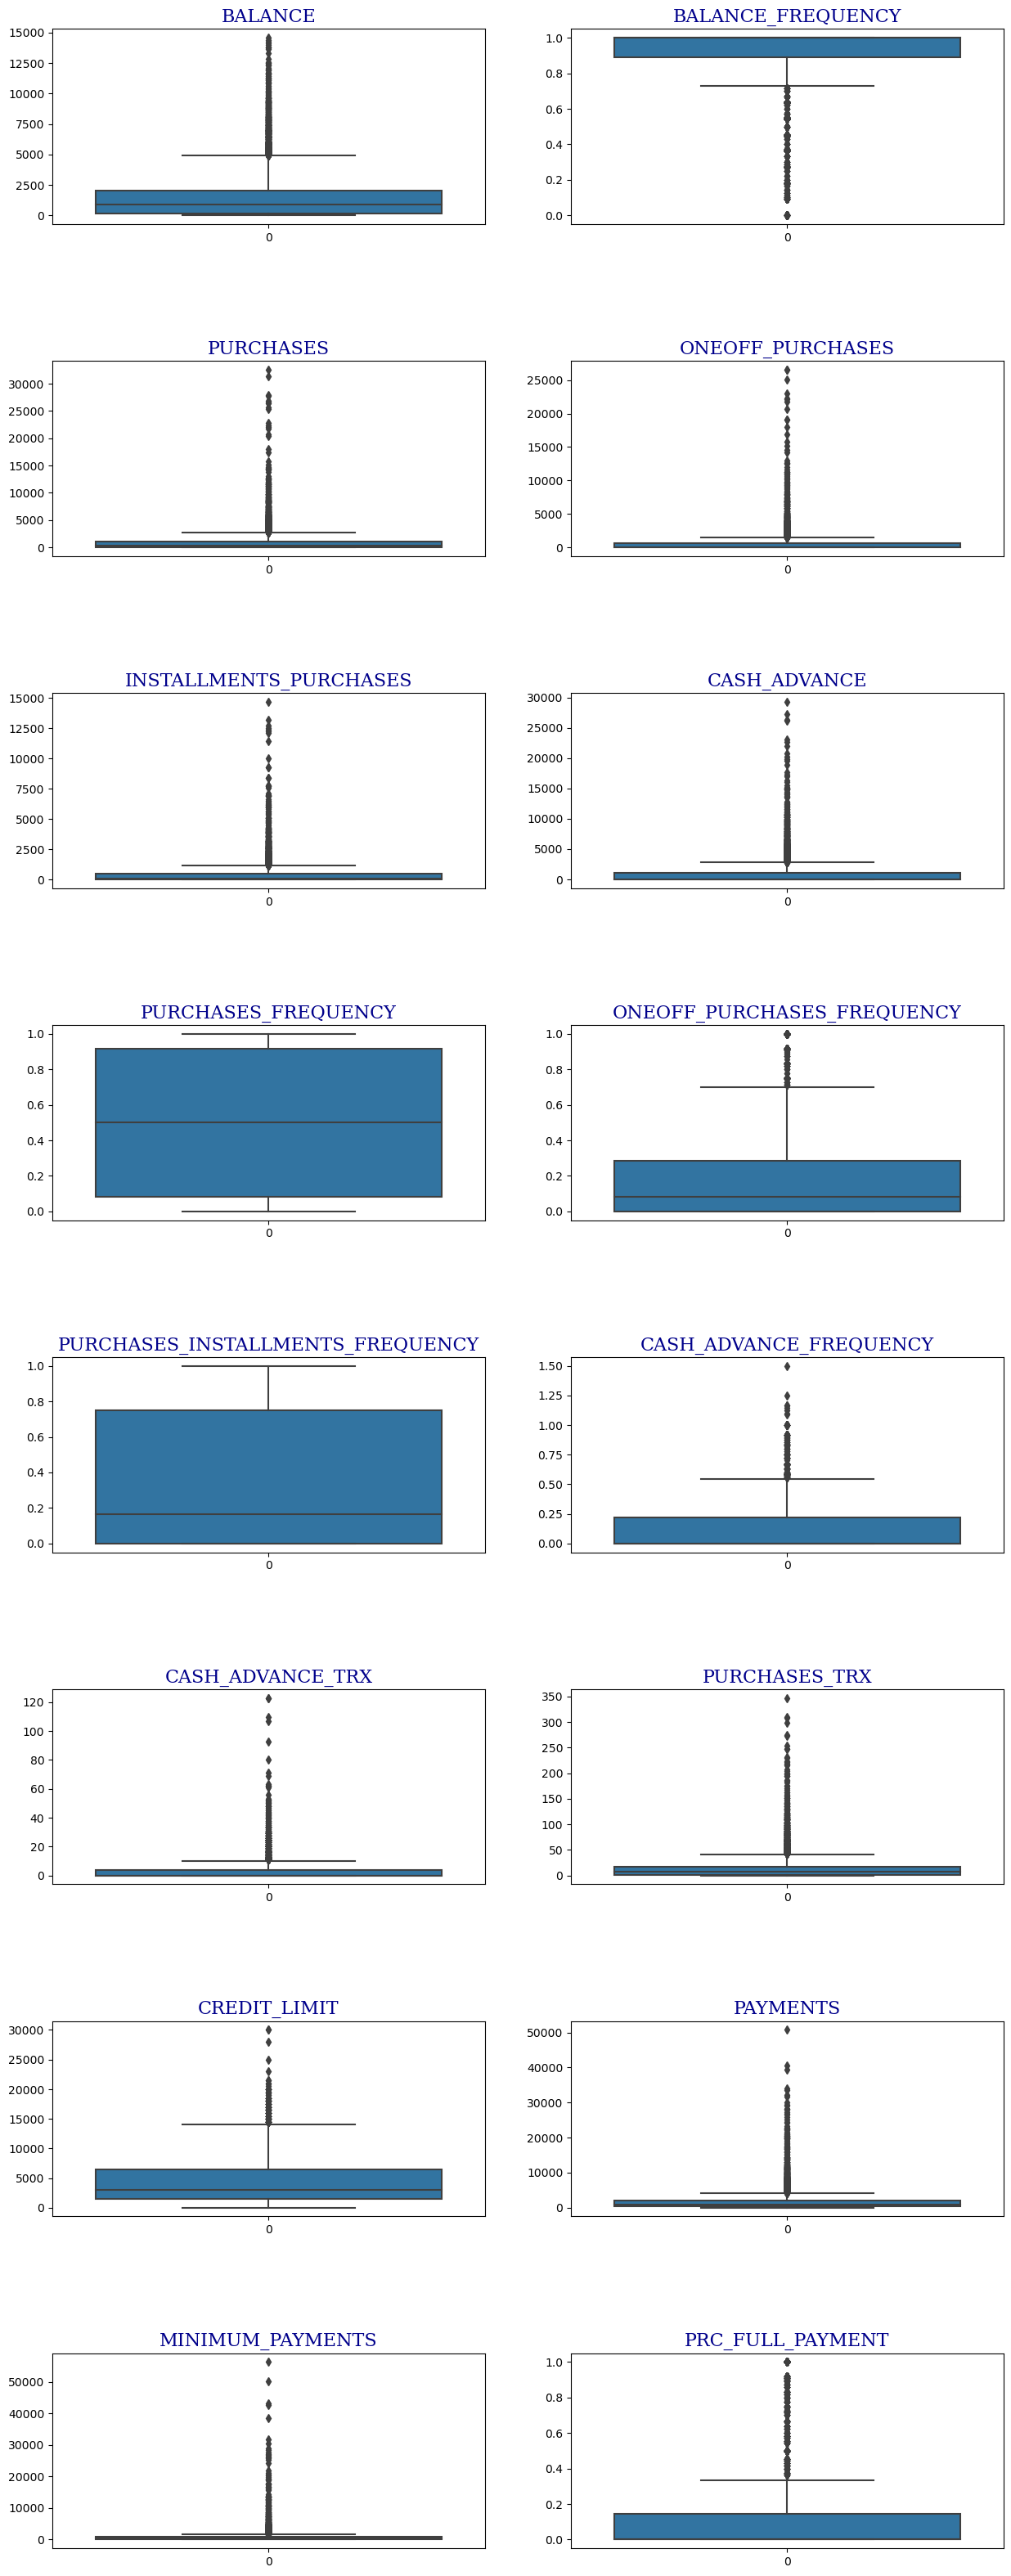

In [18]:
plot_boxplot(df, continuous_features)

In [19]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8927,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,275.861322,0.000000,6
8928,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8929,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Feature Engineering

In [20]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000
mean,1543.459045,0.877133,974.004040,571.353163,402.951697,972.291315,0.489733,0.201806,0.363822,0.134928,3.234016,14.539805,4468.282178,1703.826692,815.181824,0.153696,11.517411
std,2015.972018,0.236971,1886.385393,1438.938299,840.687831,2039.128338,0.401289,0.297671,0.397219,0.199695,6.707160,24.080898,3591.046146,2735.062280,2083.094948,0.292402,1.337798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,127.851983,0.888889,39.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,383.125845,164.264349,0.000000,12.000000
50%,870.774939,1.000000,360.100000,37.500000,88.560000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,854.446327,294.438262,0.000000,12.000000
75%,2033.525721,1.000000,1106.160000,574.305000,466.695000,1113.138205,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,1895.272891,790.691055,0.142857,12.000000
max,14581.459140,1.000000,32539.780000,26547.430000,14686.100000,29282.109150,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,56370.041170,1.000000,12.000000


<Axes: >

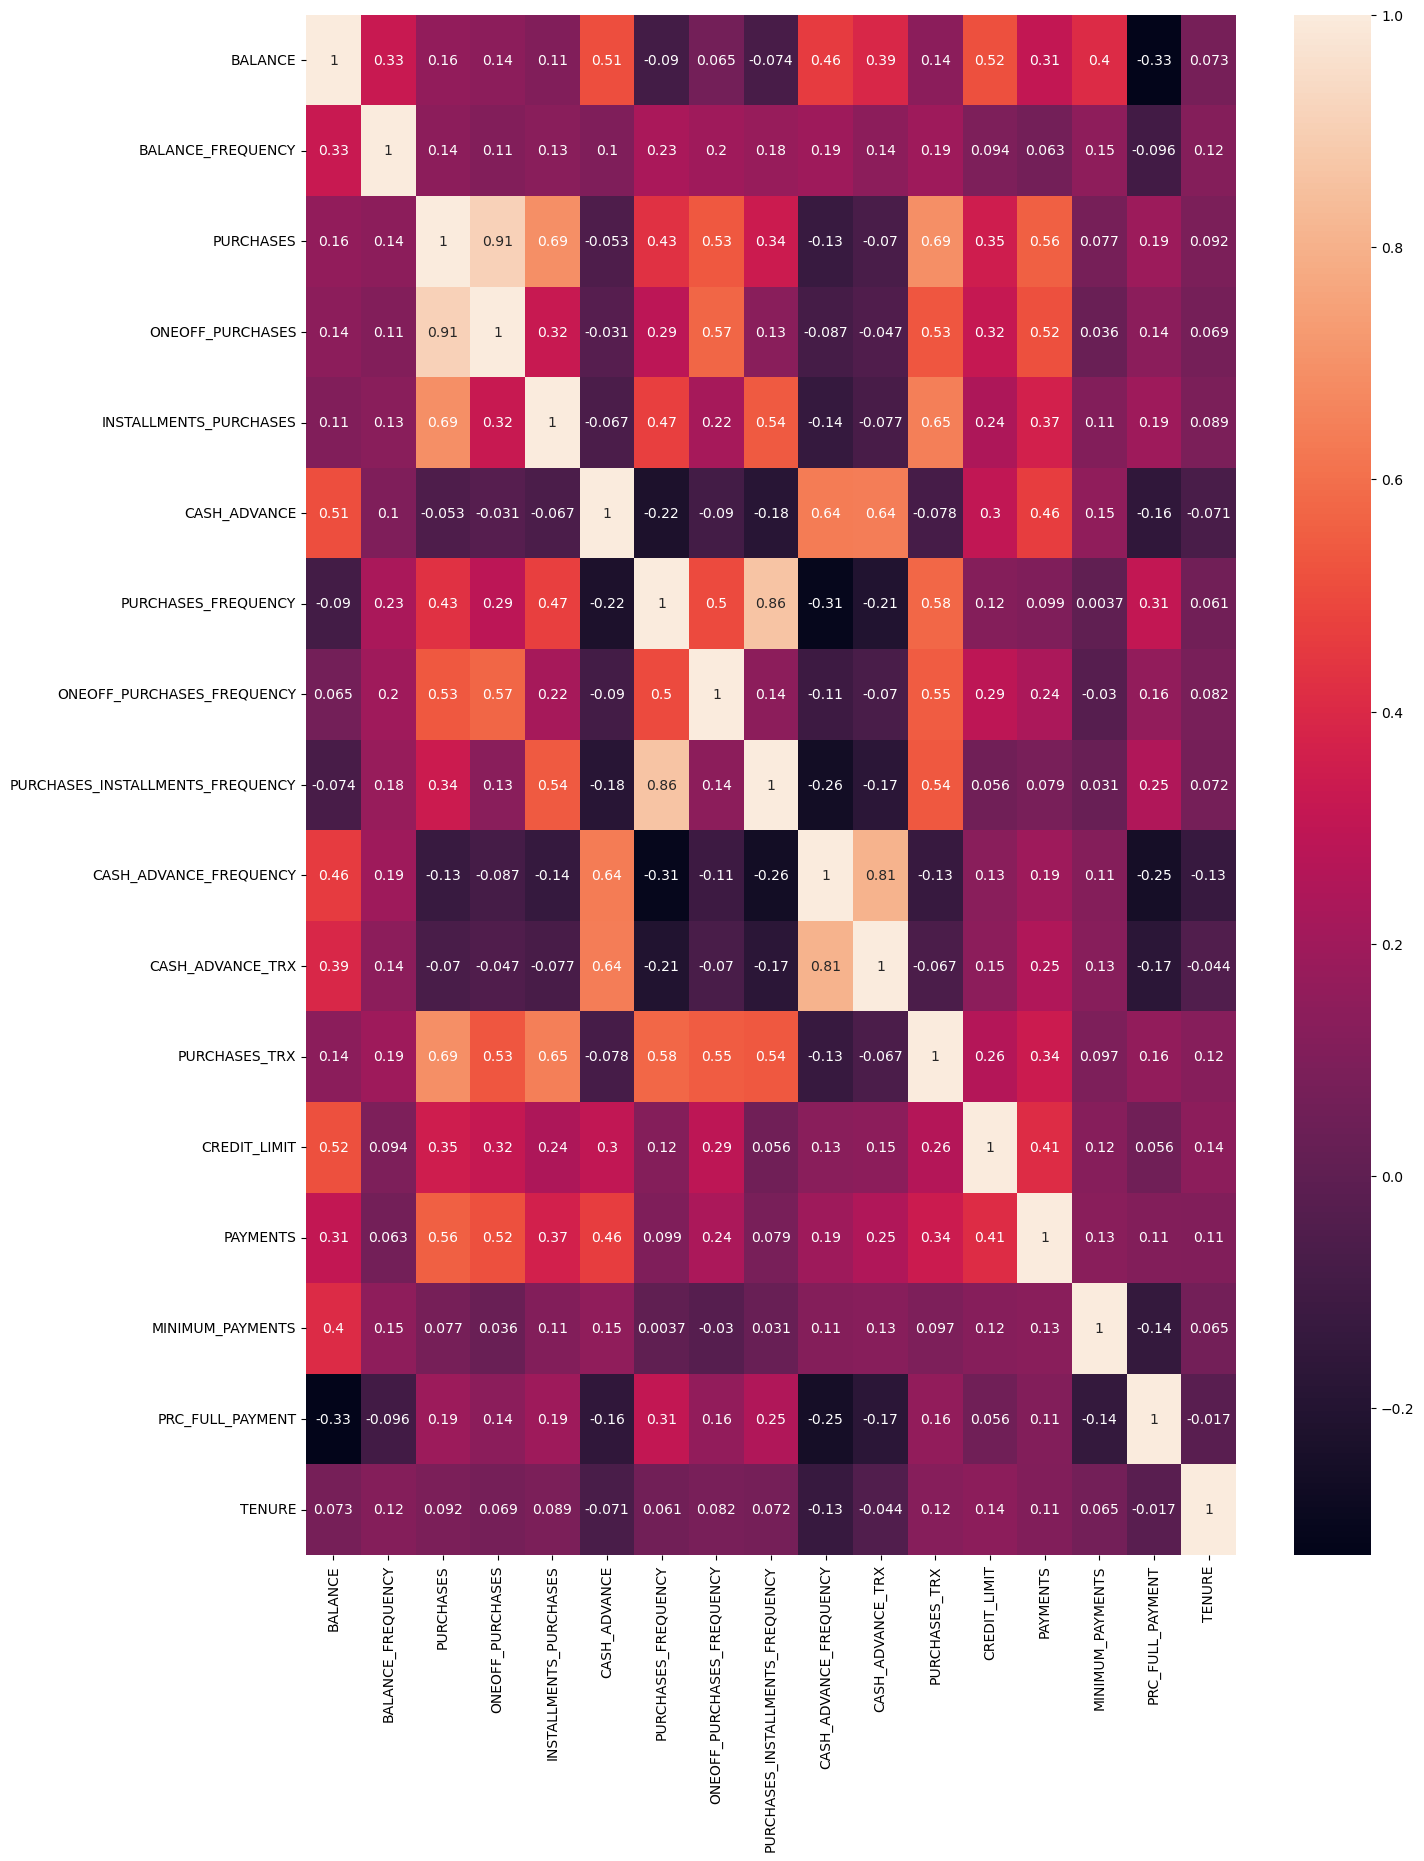

In [21]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

### Normalizing

Normalization is a technique that is applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale.

In [65]:
data = df.copy()
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Model Part

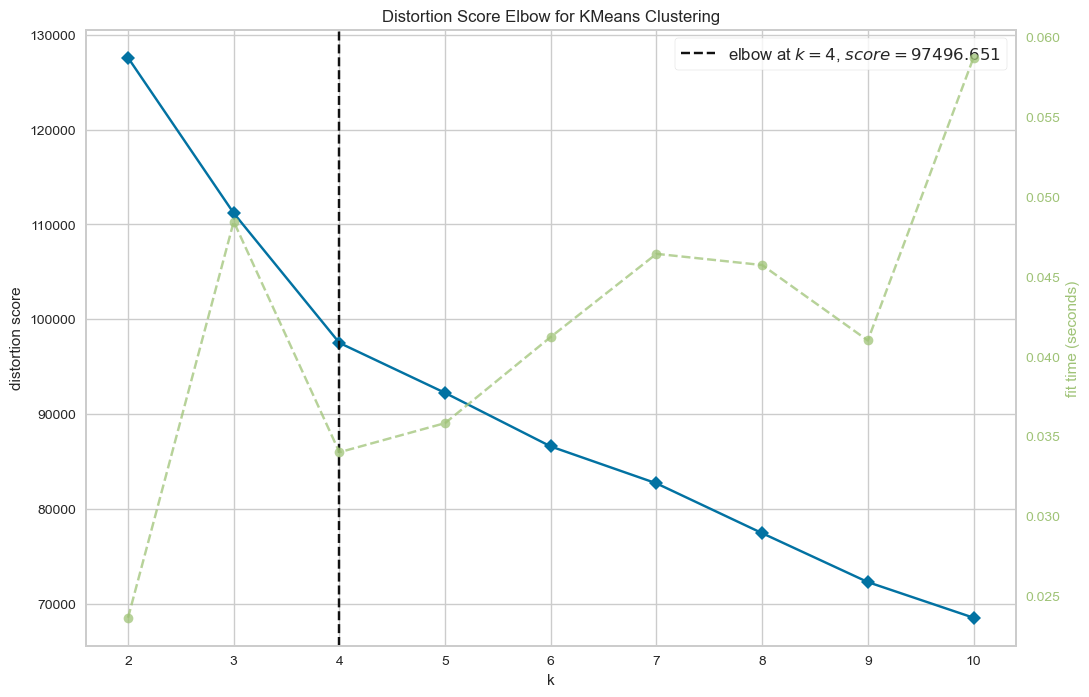

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(scaled_data)
elbow_graph.show()

### Evaluation

##### Silhouette Coefficient

If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.netrics..si1houette_ score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

+ a: The mean distance between a sample and all other points in the same class.
+ b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coeficient 's' for a single sample is then given as: s = (b-a)/(max(a, b))

The Silhouette Coeficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

Silhouette Coefficient's value ranges from -1 to 1.

1: clusters are clearly distinguished

0: distance between clusters is not significant.

-1: wrong clusters


In [110]:
inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

In [111]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    S_score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette.append(S_score)


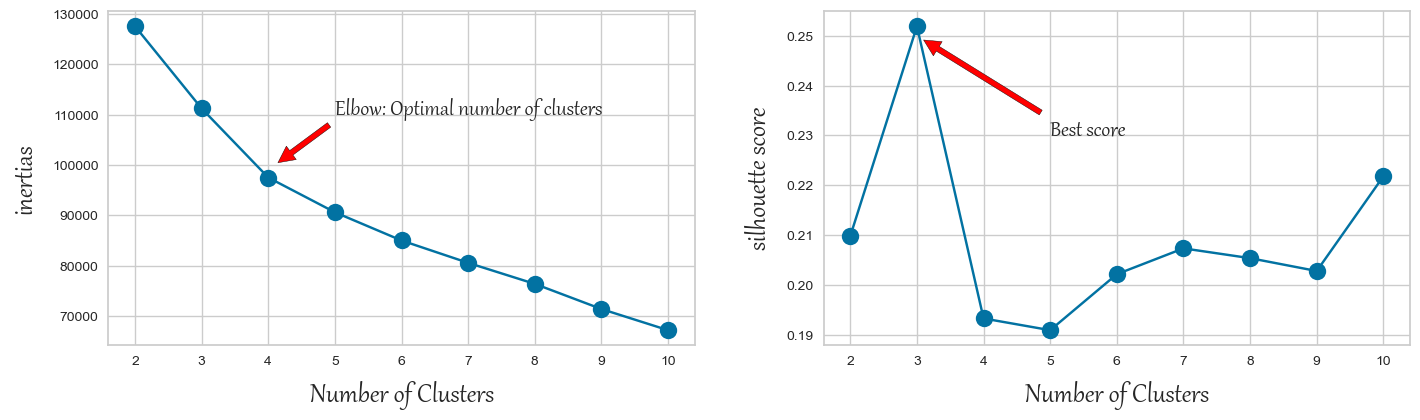

In [112]:
fig, ax = plt.subplots(1,2,facecolor="white",figsize = (15, 5))

ax[0].plot(np.arange(2 , 11), inertias, alpha = 1, color='b', marker='.', markersize=25, markerfacecolor='b')
ax[1].plot(np.arange(2 , 11), silhouette, color='b', marker='.', markersize=25, markerfacecolor='b')

ax[0].set_xlabel('Number of Clusters', fontname="Gabriola", fontsize=22, labelpad=10)
ax[1].set_xlabel('Number of Clusters', fontname="Gabriola", fontsize=22, labelpad=10)

 
ax[0].set_ylabel('inertias', fontname="Gabriola", fontsize=22, labelpad=10)    
ax[1].set_ylabel('silhouette score', fontname="Gabriola", fontsize=22, labelpad=10)


ax[0].annotate('Elbow: Optimal number of clusters', xy=(4.1, 100000), xytext=(5, 110000),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='red', shrink=0.05),)

ax[1].annotate('Best score', xy=(3, 0.25), xytext=(5, 0.23), fontsize=18, fontname="Gabriola",
             arrowprops=dict(facecolor='red', shrink=0.05),)
             
fig.tight_layout(pad=3)

plt.show()

According elbow and silhouette, we have to chose between 3 or 4 cluster, so I choose 3 clusters.

In [114]:
# assign optimal cluster to kmeans algoritm
Kmean_pred = KMeans(n_clusters=3)
Kmean_pred.fit(scaled_data)
labels = Kmean_pred.labels_
#normalize centroids
centroids = pd.DataFrame(data=Kmean_pred.cluster_centers_ , columns = [data.columns])
#real centroids
r_centers = scaler.inverse_transform(centroids)
real_centroids = pd.DataFrame(data = r_centers, columns = [data.columns])
real_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,910.178032,0.795631,310.234003,200.700195,109.815058,502.643477,0.276485,0.092489,0.177933,0.100149,1.836941,4.413532,3170.795802,886.388050,499.911252,0.099503,11.362471
1,1315.456409,0.972423,2252.679145,1277.395954,975.705574,239.113459,0.931971,0.411370,0.748694,0.042662,0.832701,34.072784,5352.278842,2227.771966,804.741025,0.293758,11.824767
2,4430.155026,0.964823,543.526803,349.137471,194.486481,4397.693252,0.279833,0.133236,0.182287,0.475062,13.925373,7.913590,7305.698779,3566.570723,2017.570300,0.037331,11.396701


#### Visualize Result

In [115]:
df['cluster']=labels
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8927,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,275.861322,0.000000,6,0
8928,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8929,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [116]:
df_count = df.groupby(by=["cluster"]).size().reset_index(name="counts")
df_count

,cluster,counts
0,0,4750
1,1,2909
2,2,1272


#### Bar_pie plot

In [117]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]], shared_yaxes=True, horizontal_spacing=0.07)

fig.append_trace(go.Bar(x=df_count["cluster"], y=df_count["counts"], orientation='v', showlegend=False,
                 marker=dict(color='aqua',line=dict(color='darkblue',width=2)),
                 name='clustering distribution', marker_color='aqua',text=df_count["counts"],textfont=dict(
                 family="sans serif", size=15, color="Blue"),textposition='auto',), 1, 1)

fig.append_trace(go.Pie(labels=df_count["cluster"],values=df_count["counts"],
                        marker=dict(colors=['DeepSkyBlue', 'gold', 'lightgreen'],line=dict(color='navy', width=2))
                       ,textfont=dict(family="sans serif", size=15, color="Blue")),1, 2)

fig.update_layout(title='Clustering distribution',font_family="Gabriola",
                  xaxis_title='count ', yaxis_title="cluster ",
                  plot_bgcolor='rgb(255,255,255)', paper_bgcolor='rgb(255,255,255)',
                  title_font=dict(size=35, color='navy', family="Gabriola"),
                  font=dict(color='navy',size=20))

fig.update_layout(
        autosize=False,
        width=900,
        height=500,)   

fig.show()

#### Scatter plot

In [86]:
col_names=['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

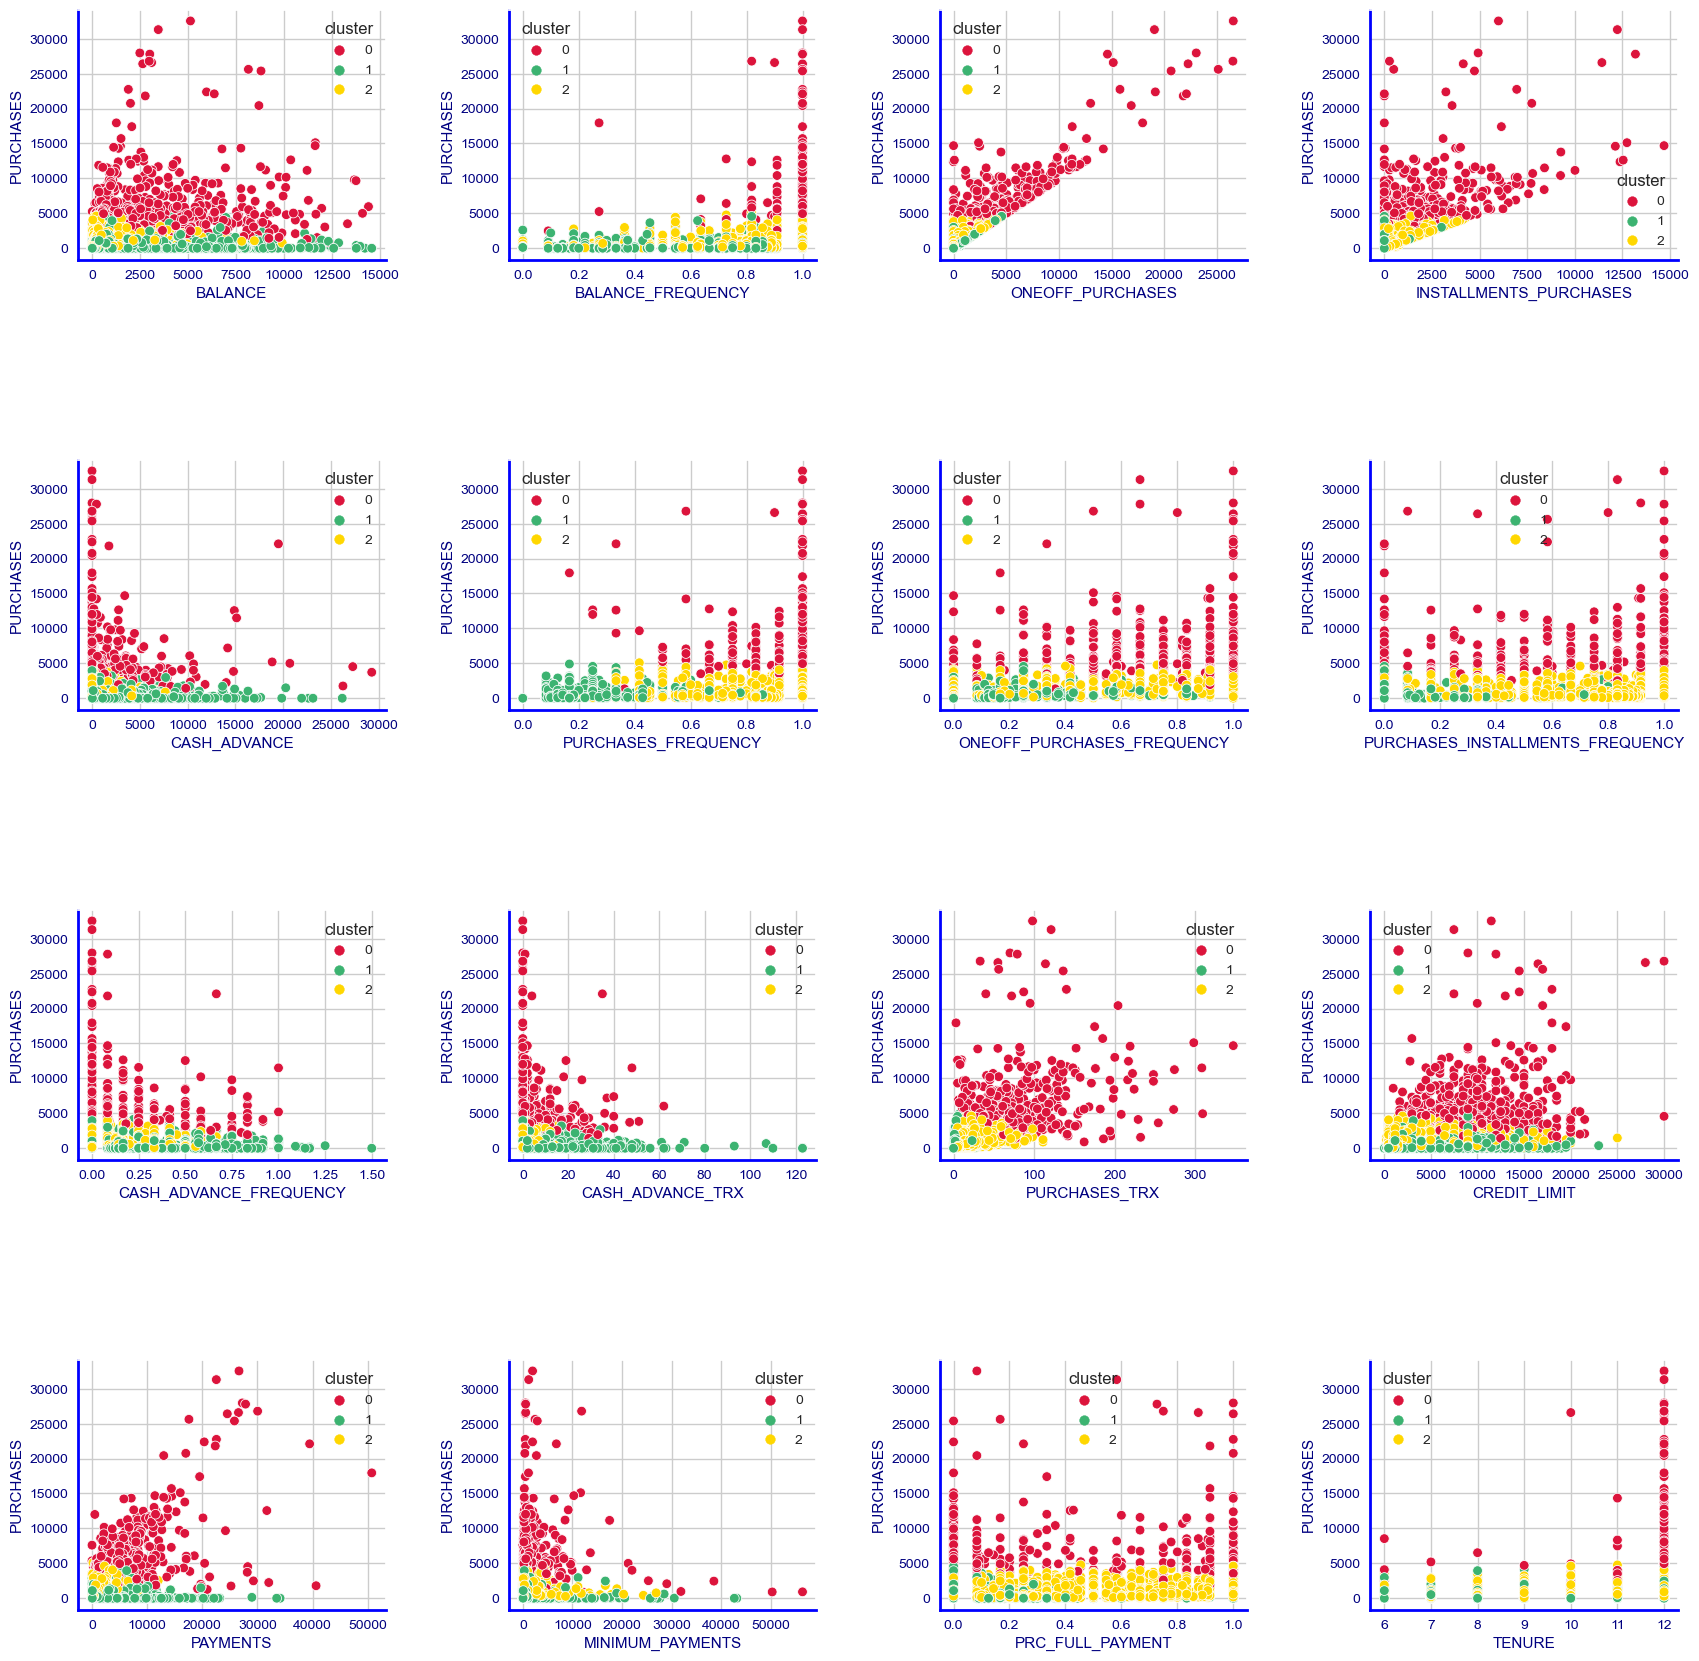

In [87]:
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1=["crimson","MediumSeaGreen","gold"]
j=0 
for i in col_names:
     
    plt.subplot(4,4,j+1)
    ax = sns.scatterplot(x=i , y  ='PURCHASES', hue='cluster', data=df, palette=palette1)
    j=j+1
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')  # 'both' refers to minor and major axes

## PCA

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [89]:
# Apply PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components=len(data.columns))
pca.fit(scaled_data)

PCA(n_components=17)

In [90]:

pca.explained_variance_ratio_*100

array([2.73867305e+01, 2.04216403e+01, 8.76541646e+00, 7.47540216e+00,
       6.23150277e+00, 5.64637551e+00, 4.82299072e+00, 4.31571810e+00,
       3.76963365e+00, 3.09485795e+00, 2.34231538e+00, 1.75332202e+00,
       1.42261629e+00, 1.28370259e+00, 1.00315282e+00, 2.64534591e-01,
       8.81663153e-05])

#### PCA 3 dimension

In [91]:
pca = PCA(n_components=3) 
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])
pca_df

,pca_1,pca_2,pca_3
0,-1.679067,-1.192767,-0.360669
1,-1.298948,2.518807,-0.615823
2,1.013432,-0.302677,-0.321514
3,-0.868638,-0.082993,-1.542718
4,-1.616744,-0.785420,-0.258549
...,...,...,...
8926,-0.286615,-2.056231,0.993681
8927,-0.518062,-1.731840,1.279764
8928,-0.876705,-1.888695,0.514975
8929,-2.360218,-0.823064,-0.881457


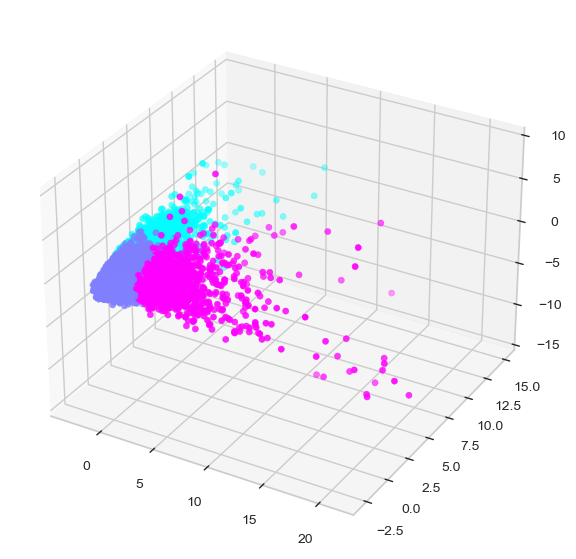

In [92]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

#### PCA 2 dimension

In [93]:
pca = PCA(n_components=2) 
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2"])
pca_df

,pca_1,pca_2
0,-1.679067,-1.192767
1,-1.298948,2.518807
2,1.013432,-0.302677
3,-0.868638,-0.082993
4,-1.616744,-0.785420
...,...,...
8926,-0.286615,-2.056231
8927,-0.518062,-1.731840
8928,-0.876705,-1.888695
8929,-2.360218,-0.823064


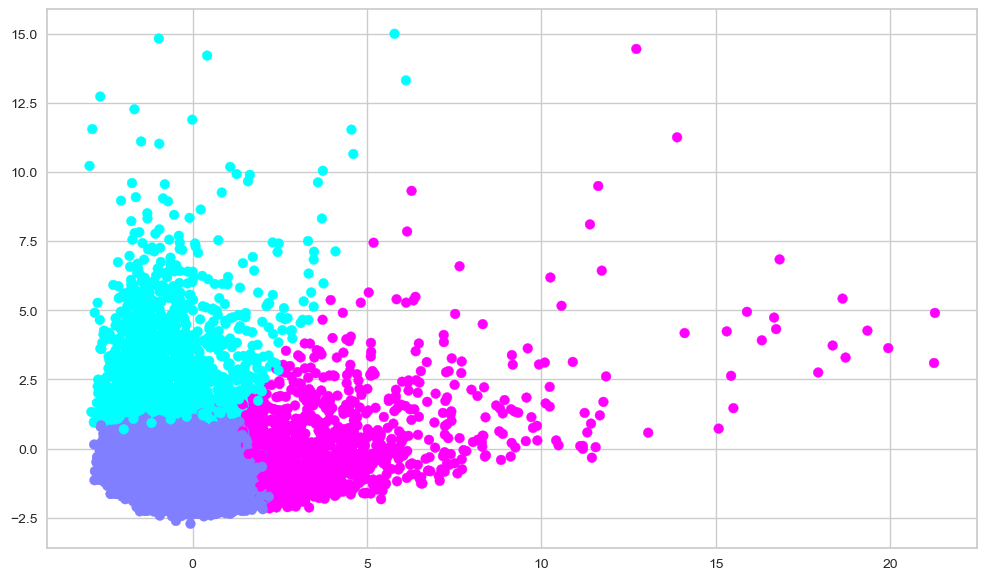

In [94]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca_1, pca_df.pca_2, c=kmeans_model.labels_, cmap="cool")
plt.show()